# Introduction

This analysis for the most part was motivated by Ray Dalio's "Principles for Navigating Big Debt Crises"
https://www.principles.com/big-debt-crises/

in the first part, the thesis is since all these debt crises follow a cause-and-effect relationship 


In [100]:
F5 = pd.read_csv("F-F_Research_Data_5_Factors.csv", header=0, index_col=0)/100

TypeError: unsupported operand type(s) for /: 'str' and 'int'

I wanted to examine what industries/sectors tend do better than the rest during a recession and what industries do poor. moreover, coming out of a recession, what would 1, 3, 5 year performance look like.

so I sourced the US Business Cycle Expansions and Contractions and went about examining the top-5 performers in each catagory.

we begin our analysis by sourcing both industry ruturn data as well as factor data from Ken French's page:
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

The Fama/French 5 factors (2x3) are constructed using the 6 value-weight portfolios formed on size and book-to-market, the 6 value-weight portfolios formed on size and operating profitability, and the 6 value-weight portfolios formed on size and investment. 

In [51]:
import pandas as pd


ind_ew = pd.read_csv("49_ew_ports.csv", header=0, index_col=0)/100
ind_vw = pd.read_csv("49_vw_ports.csv", header=0, index_col=0)/100


F3 = pd.read_csv("F-F_Research_Data_Factors_m.csv", header=0, index_col=0)/100
#F5 = pd.read_csv("F-F_Research_Data_5_Factors.csv", header=0, index_col=0)/100



ind_ew.index = pd.to_datetime(ind_ew.index, format="%Y%m").to_period('M')
ind_vw.index = pd.to_datetime(ind_vw.index, format="%Y%m").to_period('M')

F3.index = pd.to_datetime(F3.index, format="%Y%m").to_period('M')
#F5.index = pd.to_datetime(F5.index, format="%Y%m").to_period('M')

In [52]:
ind_ew.columns = ind_ew.columns.str.strip()
ind_vw.columns = ind_vw.columns.str.strip()

In [53]:
ind_vw.columns

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin',
       'Other'],
      dtype='object')

In [66]:
ind_vw.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07,0.0237,0.0012,-0.9999,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0194,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0485,0.0520
1926-08,0.0223,0.0268,-0.9999,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,-0.0057,0.0676
1926-09,-0.0057,0.0158,-0.9999,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0006,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0314,-0.0386
1926-10,-0.0046,-0.0368,-0.9999,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,0.0207,-0.0849
1926-11,0.0675,0.0626,-0.9999,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0160,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0492,0.0400


In [77]:
ind_vw["Trans"]["1937":]

1937-01    0.0118
1937-02    0.0592
1937-03    0.0522
1937-04   -0.0480
1937-05   -0.0385
            ...  
2020-11    0.1710
2020-12    0.0073
2021-01   -0.0458
2021-02    0.0878
2021-03    0.0784
Freq: M, Name: Trans, Length: 1011, dtype: float64

In [54]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit_127 as erk


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Now we need to mark down business cycle dates to analyze the return data based on different cycles

https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions

we can examine the industry sharpe ratios both during contractions and expansions 

<AxesSubplot:title={'center':'Industry Return 1937-1938'}>

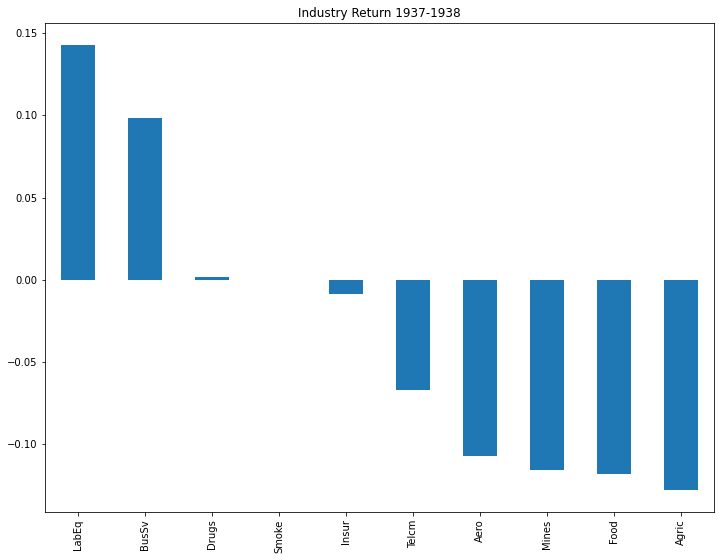

In [69]:
erk.annualize_rets(ind_vw["1937-05":"1938-06"], 12).sort_values(ascending=False)[:10].plot.bar(figsize=(12,9), title="Industry Return 1937-1938")

<AxesSubplot:title={'center':'Industry Sharpe Ratios 37-38 recession'}>

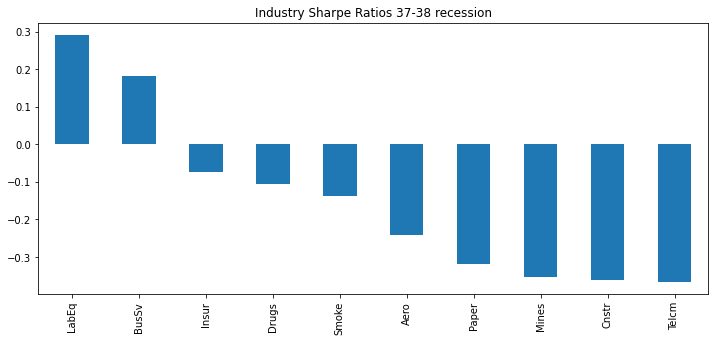

In [56]:
erk.sharpe_ratio(ind_vw["1937-05":"1938-06"], 0.03, 12).sort_values(ascending=False)[:10].plot.bar(figsize=(12,5), title="Industry Sharpe Ratios 37-38 recession")

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2020'}>

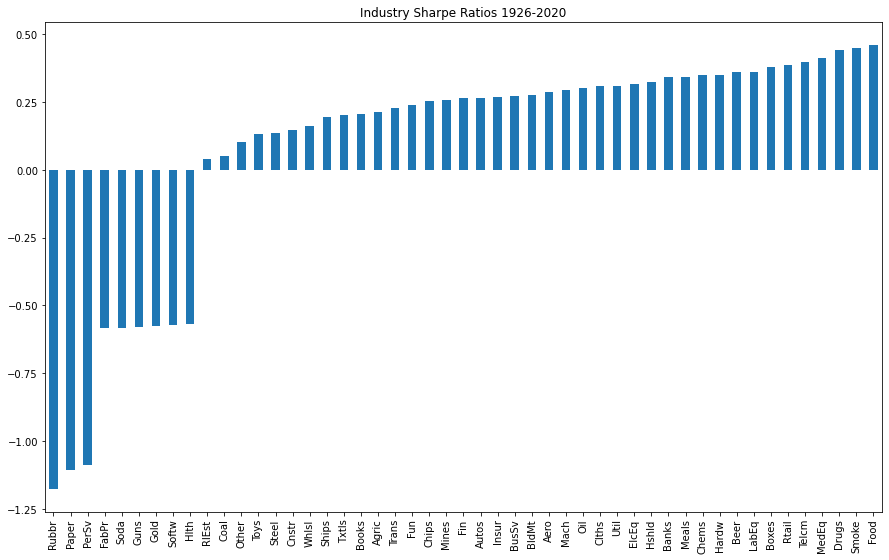

In [63]:
erk.sharpe_ratio(ind_vw, 0.03, 12).sort_values().plot.bar(figsize=(15,9), title="Industry Sharpe Ratios 1926-2020")

<AxesSubplot:>

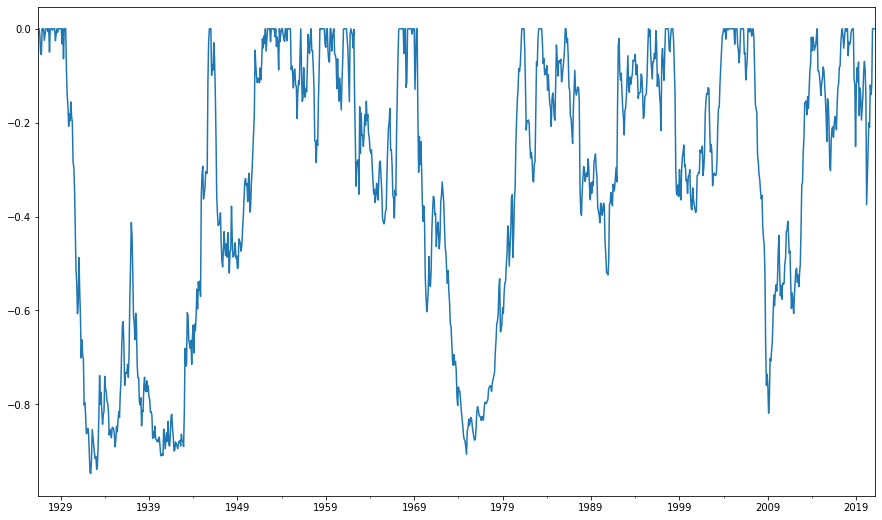

In [65]:
erk.drawdown(ind_ew["RlEst"])["Drawdown"].plot.line(figsize=(15,9))

<AxesSubplot:title={'center':'Industry Sharpe Ratios since 2000'}>

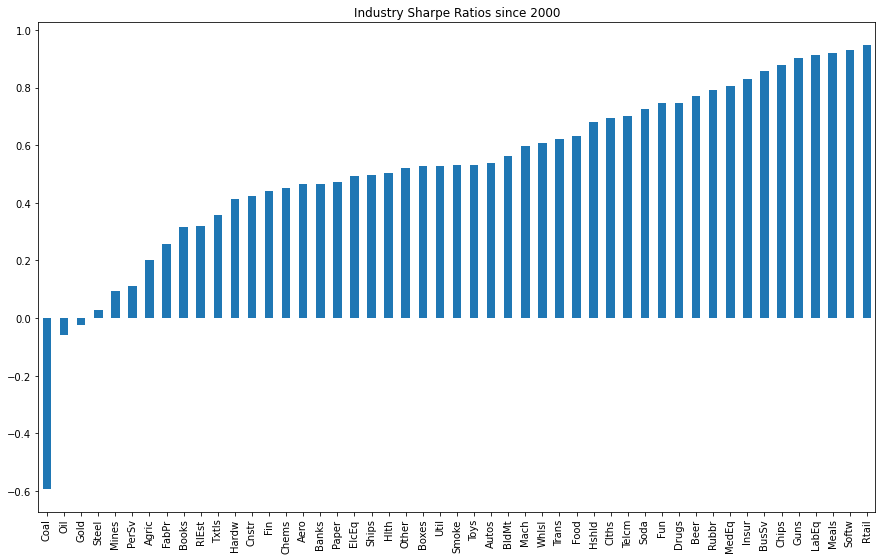

In [73]:
erk.sharpe_ratio(ind_vw["2010":], 0.03, 12).sort_values().plot.bar(figsize=(15,9), title='Industry Sharpe Ratios since 2000')

<AxesSubplot:title={'center':'Industry Sharpe Ratios during 1937-38'}>

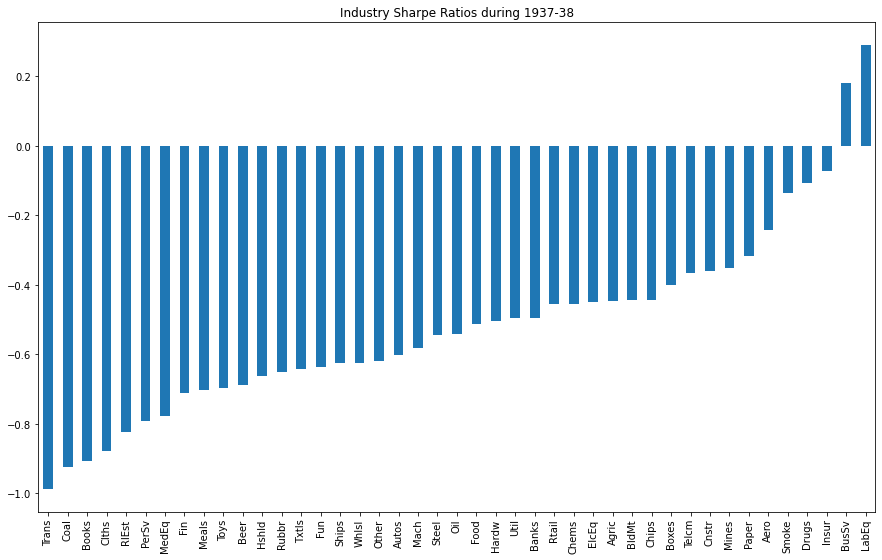

In [78]:
df1 = ind_vw.drop(['Soda', 'Gold', 'FabPr', 'Softw', 'Hlth', 'Guns'], axis=1)
erk.sharpe_ratio(df1["1937-05":"1938-06"], 0.03, 12).sort_values().plot.bar(figsize=(15,9),title='Industry Sharpe Ratios during 1937-38')

Let's compare this to 2008 contraction 

<AxesSubplot:title={'center':'Industry Sharpe Ratios during 2008'}>

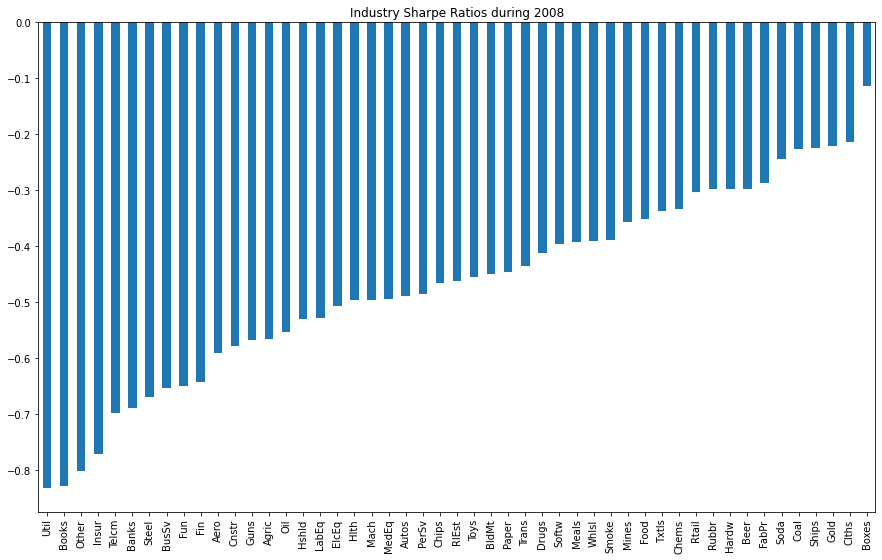

In [88]:
erk.sharpe_ratio(ind_vw["2007-12":"2009-09"], 0.03, 12).sort_values().plot.bar(figsize=(15,9),title='Industry Sharpe Ratios during 2008')

Let's look at top and bottom performers during recessions to see if there is persistence 

<AxesSubplot:title={'center':'Industry Sharpe Ratios during 1945'}>

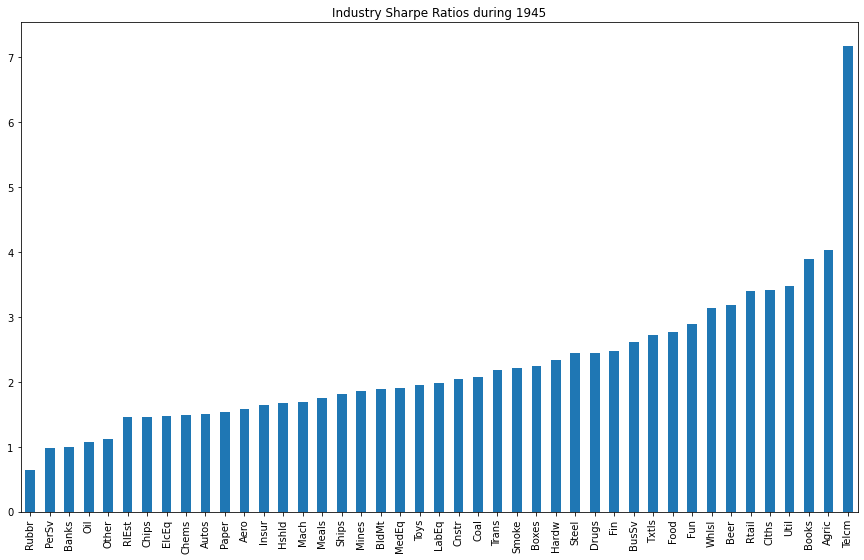

In [82]:
df1 = ind_vw.drop(['Soda', 'Gold', 'FabPr', 'Softw', 'Hlth', 'Guns'], axis=1)

erk.sharpe_ratio(df1["1945-02":"1945-10"], 0.03, 12).sort_values().plot.bar(figsize=(15,9),title='Industry Sharpe Ratios during 1945')

<AxesSubplot:title={'center':'Industry Sharpe Ratios during 1949'}>

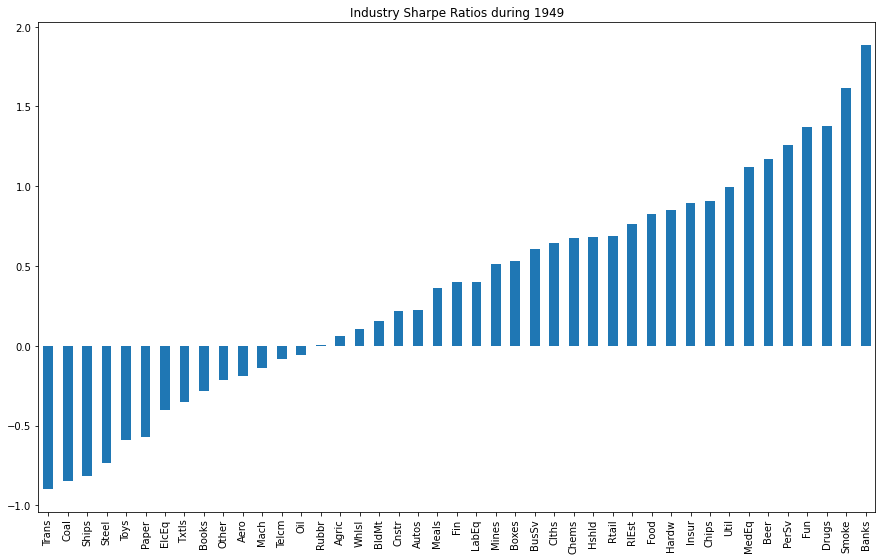

In [86]:
#df1 = ind_vw.drop(['Soda', 'Gold', 'FabPr', 'Softw', 'Hlth', 'Guns'], axis=1)

erk.sharpe_ratio(df1["1948-11":"1949-10"], 0.03, 12).sort_values().plot.bar(figsize=(15,9),title='Industry Sharpe Ratios during 1949')

<AxesSubplot:title={'center':'Industry Sharpe Ratios during 1969'}>

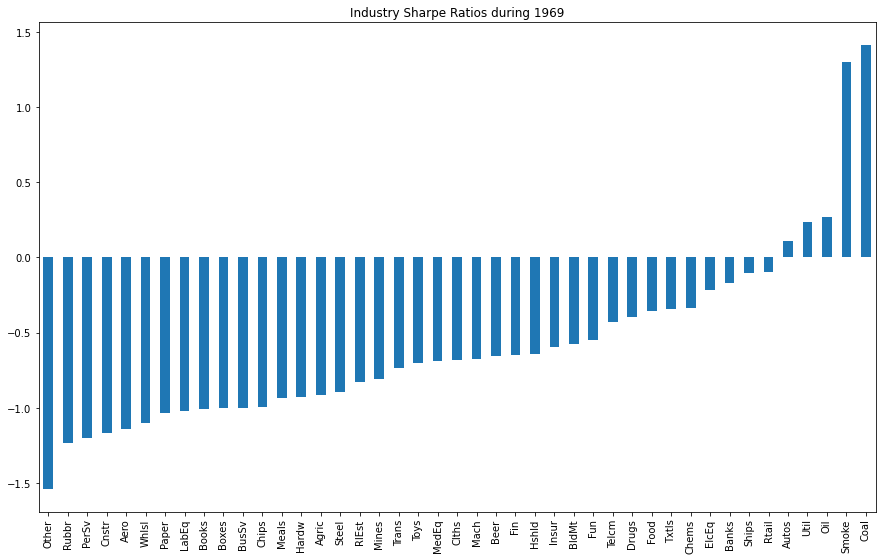

In [91]:
erk.sharpe_ratio(df1["1969-12":"1970-11"], 0.03, 12).sort_values().plot.bar(figsize=(15,9),title='Industry Sharpe Ratios during 1969')

<AxesSubplot:title={'center':'Industry Sharpe Ratios during 1973'}>

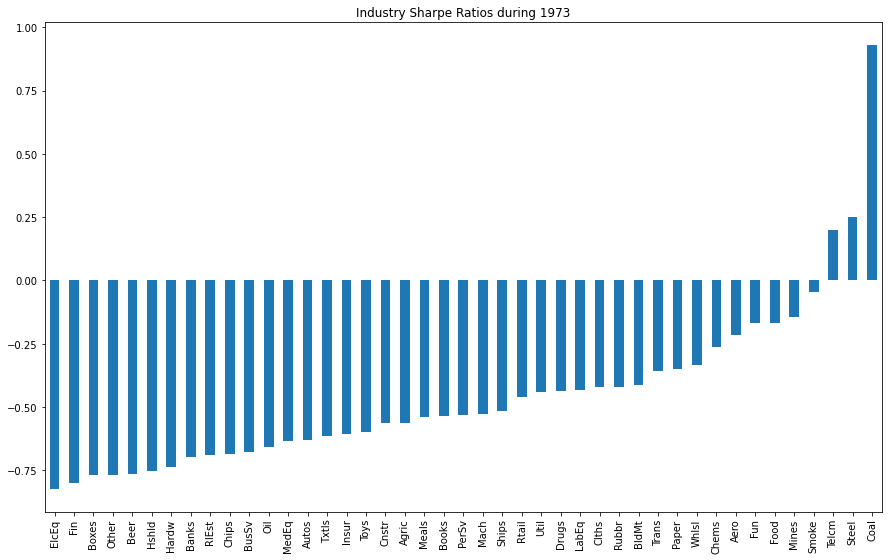

In [92]:
erk.sharpe_ratio(df1["1973-11":"1975-03"], 0.03, 12).sort_values().plot.bar(figsize=(15,9),title='Industry Sharpe Ratios during 1973')

Books Looks like an industry that consistently does poorly during recesions, we can confirm this by drawing its drawdown

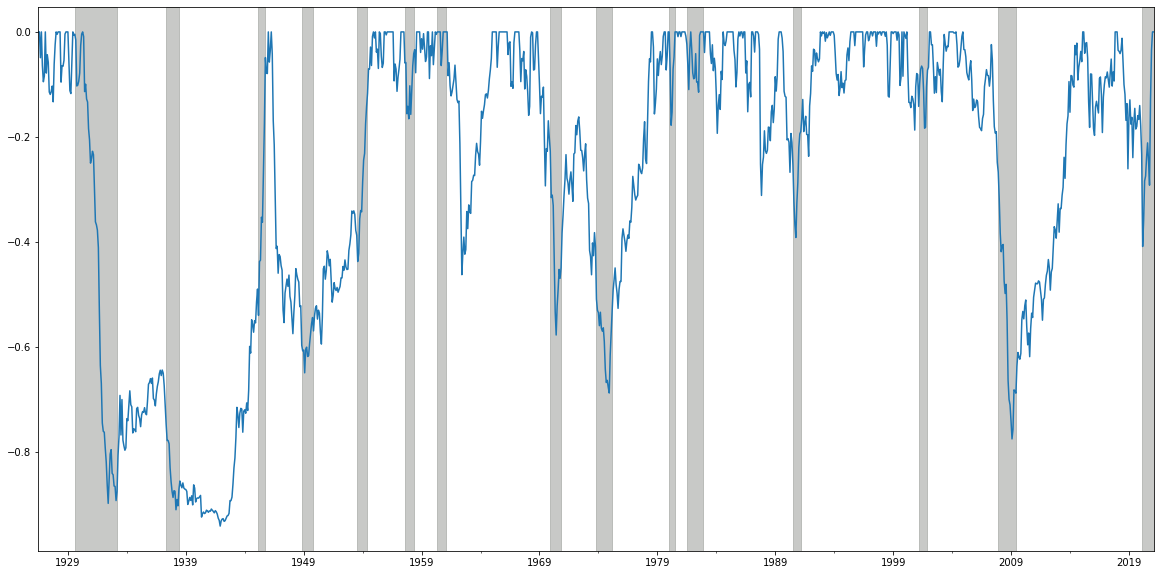

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = erk.drawdown(ind_vw["Books"])["Drawdown"].plot.line(figsize=(20,10))

#ax.axvline(x="1939-09", color='r', linestyle='--')
#ax.axvline(x="1945-09", color='r', linestyle='--')

ax.axvspan("1929-08", "1933-03", color=sns.xkcd_rgb['grey'], alpha=0.5)

ax.axvspan("1937-05", "1938-06", color=sns.xkcd_rgb['grey'], alpha=0.5)

ax.axvspan("1945-02", "1945-10", color=sns.xkcd_rgb['grey'], alpha=0.5)

ax.axvspan("1948-11", "1949-10", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("1953-07", "1954-05", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("1957-08", "1958-05", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("1960-05", "1961-02", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("1969-12", "1970-11", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("1973-11", "1975-03", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("1980-01", "1980-07", color=sns.xkcd_rgb['grey'], alpha=0.5)



ax.axvspan("1981-07", "1982-11", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("1990-07", "1991-03", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("2001-03", "2001-11", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan("2007-12", "2009-06", color=sns.xkcd_rgb['grey'], alpha=0.5)

ax.axvspan("2020-02", "2021-03", color=sns.xkcd_rgb['grey'], alpha=0.5)


ax.axvspan(xmin=1929, xmax=1934, alpha=0.1, color='red')

plt.show()